<a href="https://colab.research.google.com/github/Atrib99/ProgrammingAssignment2/blob/master/GNFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time
import datetime
import warnings
#import the data...GNFC
tickerSymbol = "GNFC.NS"
data = yf.Ticker(tickerSymbol)
data

end_date = datetime.date.today()
start_date = end_date-datetime.timedelta(days=365)
tomorrow = end_date+datetime.timedelta(days=1)
prices = data.history(start=start_date,end=end_date).Close
prices

Date
2022-12-07 00:00:00+05:30    563.424866
2022-12-08 00:00:00+05:30    569.863708
2022-12-09 00:00:00+05:30    556.652100
2022-12-12 00:00:00+05:30    562.947876
2022-12-13 00:00:00+05:30    569.815979
                                ...    
2023-11-30 00:00:00+05:30    686.849976
2023-12-01 00:00:00+05:30    703.000000
2023-12-04 00:00:00+05:30    711.549988
2023-12-05 00:00:00+05:30    712.549988
2023-12-06 00:00:00+05:30    737.450012
Name: Close, Length: 247, dtype: float64

In [ ]:
#Calculate Returns
returns = prices.pct_change().dropna()
returns

Date
2022-12-08 00:00:00+05:30    0.011428
2022-12-09 00:00:00+05:30   -0.023184
2022-12-12 00:00:00+05:30    0.011310
2022-12-13 00:00:00+05:30    0.012200
2022-12-14 00:00:00+05:30    0.003181
                               ...   
2023-11-30 00:00:00+05:30   -0.001599
2023-12-01 00:00:00+05:30    0.023513
2023-12-04 00:00:00+05:30    0.012162
2023-12-05 00:00:00+05:30    0.001405
2023-12-06 00:00:00+05:30    0.034945
Name: Close, Length: 246, dtype: float64

Text(0.5, 1.0, 'Stock Prices')

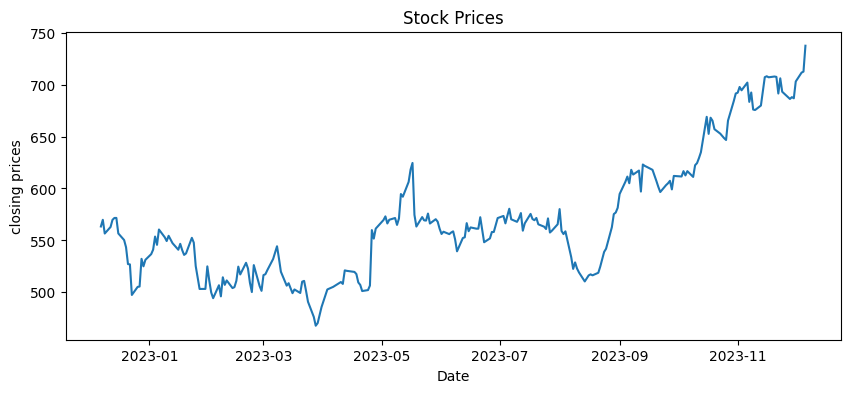

In [ ]:
#Plot The Stock Prices
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel("closing prices")
plt.xlabel("Date")
plt.title("Stock Prices")


Text(0.5, 1.0, 'Returns of GNFC')

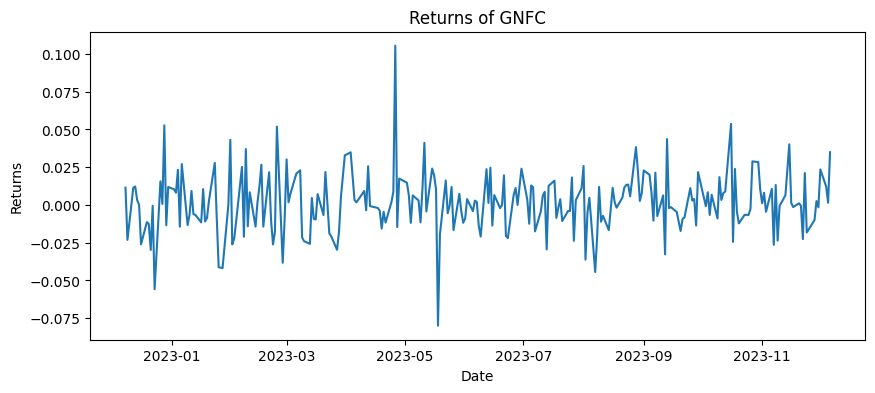

In [ ]:
#Plot The Returns
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel("Returns")
plt.xlabel("Date")
plt.title("Returns of GNFC")

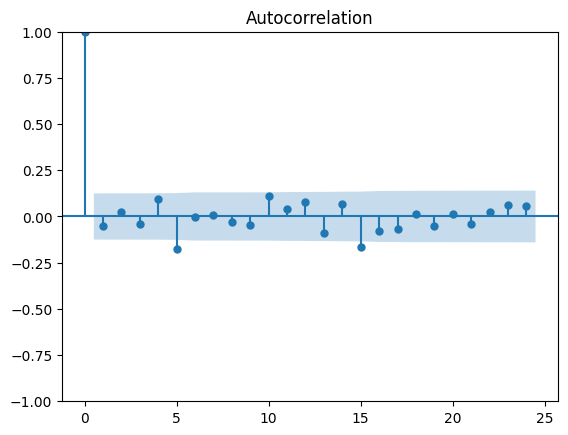

In [ ]:
#Plot acf(MA) and pacf(AR)
plot_acf(returns)
plt.show()

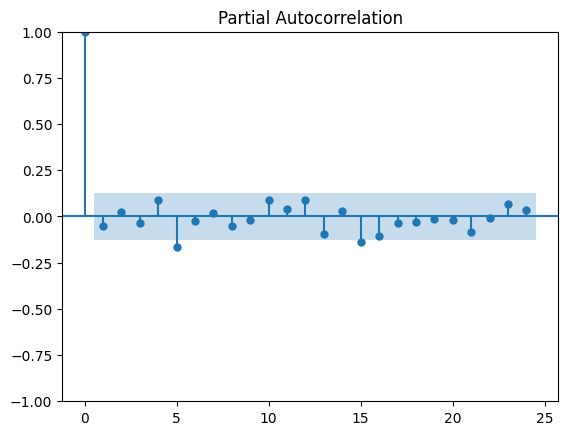

In [ ]:
#pacf
plot_pacf(returns ,method = 'ywm')
plt.show()

In [ ]:
#Building the model of ARIMA
model = ARIMA(prices,order = (7,0,6))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  247
Model:                 ARIMA(7, 0, 6)   Log Likelihood                -941.667
Date:                Thu, 07 Dec 2023   AIC                           1913.334
Time:                        14:21:38   BIC                           1965.975
Sample:                             0   HQIC                          1934.527
                                - 247                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        570.1325     81.896      6.962      0.000     409.619     730.646
ar.L1          0.3640     20.049      0.018      0.986     -38.932      39.660
ar.L2         -0.2462      4.154     -0.059      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#Prediction for the next 100 days
next_day_price = fitted.forecast(10, alpha=0.05)
print(next_day_price)



247    733.272036
248    733.465431
249    731.528931
250    732.533146
251    727.084253
252    727.973661
253    726.213740
254    725.573878
255    721.741069
256    723.126310
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
#Prediction for next day
predict_price = next_day_price.values[0]
print(f"The predicted price for {tomorrow}tomorrow:",predict_price)


The predicted price for 2023-12-08tomorrow: 733.272035662686
